In [72]:
import matplotlib.pyplot as plt
import numpy as np
from theory_template import *

In [73]:
filename = "Equation_M_A_DR8_NGC_217_N_ap30_a1_dd20_Njk100.npz"
f = np.load(filename)
f.__dict__
Equation_M = f["Equation_M"]
Equation_A = f["Equation_A"]
delta_redshift = f["delta_redshift"]


In [74]:
def solve_pairwise_signal(Equation_M, Equation_A, rows):
    signal = np.zeros((len(rows), Equation_M.shape[2], Equation_M.shape[3]))
    for i in range(Equation_M.shape[3]):  # N_jk
        for j in range(Equation_M.shape[2]): #n_rbin
            M = Equation_M[:,:,j,i]  + Equation_M[:,:,j,i] .T - np.diag(np.diag(Equation_M[:,:,j,i]))
            M = M[np.ix_(rows, rows)]
            A = Equation_A[rows, j, i]
            
            signal[:, j, i] = np.linalg.solve(M, A)
    return signal


In [89]:
class pairwise_signal:
    def __init__(self, Equation_M, Equation_A, r, z_mean, bias_mean, model):
        self.model = model
        if model == "1a":
             signal = solve_pairwise_signal(Equation_M, Equation_A, rows=[0, 3])
             self.T_pkSZ = signal[0,:,:]
             self.n0 = signal[1,:,:]

             f=get_emulator_pairwise_velocity(r,zs=z_mean,bs=bias_mean)

        
        if model == "1b":
             signal = solve_pairwise_signal(Equation_M, Equation_A, rows=[0, 2])
             self.T_pkSZ = signal[0,:,:]
             self.n1 = signal[1,:,:]

        if model == "1c":
             signal = solve_pairwise_signal(Equation_M, Equation_A, rows=[0, 1])
             self.T_pkSZ = signal[0,:,:]
             self.n2 = signal[1,:,:]


In [90]:
model1a = pairwise_signal(Equation_M, Equation_A, model = "1a")
model1b = pairwise_signal(Equation_M, Equation_A, model = "1b",)
model1c = pairwise_signal(Equation_M, Equation_A, model = "1c",)



In [91]:
model1a.T_pkSZ

array([[ 0.03332594,  0.02460742,  0.02913657, ...,  0.05050544,
         0.07172126,  0.02913821],
       [-0.0266809 , -0.02572855, -0.03155579, ..., -0.03135941,
        -0.04671051, -0.02921263],
       [ 0.14609122,  0.15064849,  0.14831508, ...,  0.12678886,
         0.13615146,  0.1400568 ],
       ...,
       [ 0.02991481,  0.02633539,  0.02190861, ...,  0.03093108,
         0.03032193,  0.02545874],
       [ 0.02713589,  0.01972904,  0.01828515, ...,  0.02950557,
         0.02575962,  0.0226105 ],
       [ 0.03040828,  0.03237249,  0.03509219, ...,  0.03767391,
         0.03781797,  0.03385617]])

[6937.95905736 3165.25611296 1148.43046842  392.88785315  317.05655826
  169.12490866   84.9906701    73.59813832   54.3737925    38.82163337
   26.94325688   16.71768315   14.07027572   11.80813736   13.50663284]
[-0.01219345  0.1240998   0.1595843   0.12807816  0.12738889  0.07292068
  0.04085353  0.04011512  0.05452662  0.0330894   0.03136763  0.02288005
  0.01386437  0.00522634  0.01953312]


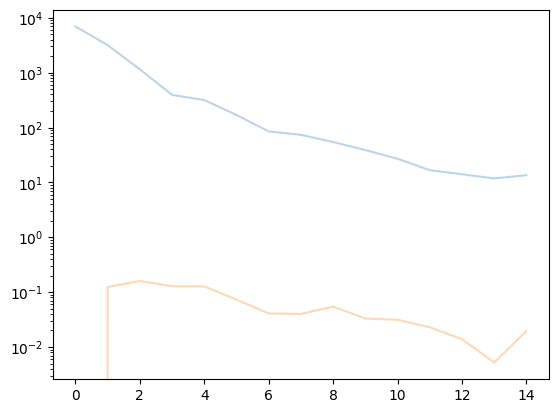

In [69]:
signal = solve_pairwise_signal(Equation_M, Equation_A, rows=[0,1])
plt.plot(np.mean(signal[1,:,:], axis=1), alpha=0.3)
print(np.mean(signal[1,:,:], axis=1))
signal = solve_pairwise_signal(Equation_M, Equation_A, rows=[0,3])
plt.plot(np.mean(signal[1,:,:], axis=1), alpha=0.3)
print(np.mean(signal[1,:,:], axis=1))
plt.yscale("log")